In [5]:
pip install polars lazypredict

Note: you may need to restart the kernel to use updated packages.


In [3]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from lazypredict.Supervised import LazyClassifier
from sklearn.metrics import classification_report, confusion_matrix

In [4]:
df = pd.read_csv("heart.csv")

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 303 entries, 0 to 302
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       303 non-null    int64  
 1   sex       303 non-null    int64  
 2   cp        303 non-null    int64  
 3   trtbps    303 non-null    int64  
 4   chol      303 non-null    int64  
 5   fbs       303 non-null    int64  
 6   restecg   303 non-null    int64  
 7   thalachh  303 non-null    int64  
 8   exng      303 non-null    int64  
 9   oldpeak   303 non-null    float64
 10  slp       303 non-null    int64  
 11  caa       303 non-null    int64  
 12  thall     303 non-null    int64  
 13  output    303 non-null    int64  
dtypes: float64(1), int64(13)
memory usage: 33.3 KB


In [6]:
df

,age,sex,cp,trtbps,chol,fbs,restecg,thalachh,exng,oldpeak,slp,caa,thall,output
0,63,1,3,145,233,1,0,150,0,2.30,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.50,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.40,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.80,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.60,2,0,2,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
298,57,0,0,140,241,0,1,123,1,0.20,1,0,3,0
299,45,1,3,110,264,0,1,132,0,1.20,1,0,3,0
300,68,1,0,144,193,1,1,141,0,3.40,1,2,3,0
301,57,1,0,130,131,0,1,115,1,1.20,1,1,3,0


<h1> Terms </h1>
age     : Age of the patient.<br>
sex     : Gender of the patient (1 = male, 0 = female).<br>
cp      : Type of chest pain.<br>
trtbps  : Resting blood pressure.<br>
chol    : Serum cholesterol level.<br>
fbs     : Fasting blood sugar level (1 if > 120 mg/dL).<br>
restecg : Results of resting electrocardiogram.<br>
thalachh: Maximum heart rate achieved.<br>
exng    : Exercise-induced angina (1 = yes).<br>
oldpeak : ST depression induced by exercise.<br>
slp     : Slope of the peak exercise ST segment.<br>
caa     : Number of major vessels colored by fluoroscopy.<br>
thall   : Thalassemia status.<br>
output  : Presence of heart disease (1 = yes, 0 = no).


## Statistics summary

In [13]:
df.describe(include='all')

,age,sex,cp,trtbps,chol,fbs,restecg,thalachh,exng,oldpeak,slp,caa,thall,output
count,303.00,303.00,303.00,303.00,303.00,303.00,303.00,303.00,303.00,303.00,303.00,303.00,303.00,303.00
mean,54.37,0.68,0.97,131.62,246.26,0.15,0.53,149.65,0.33,1.04,1.40,0.73,2.31,0.54
std,9.08,0.47,1.03,17.54,51.83,0.36,0.53,22.91,0.47,1.16,0.62,1.02,0.61,0.50
min,29.00,0.00,0.00,94.00,126.00,0.00,0.00,71.00,0.00,0.00,0.00,0.00,0.00,0.00
25%,47.50,0.00,0.00,120.00,211.00,0.00,0.00,133.50,0.00,0.00,1.00,0.00,2.00,0.00
50%,55.00,1.00,1.00,130.00,240.00,0.00,1.00,153.00,0.00,0.80,1.00,0.00,2.00,1.00
75%,61.00,1.00,2.00,140.00,274.50,0.00,1.00,166.00,1.00,1.60,2.00,1.00,3.00,1.00
max,77.00,1.00,3.00,200.00,564.00,1.00,2.00,202.00,1.00,6.20,2.00,4.00,3.00,1.00


## Reshaping the columns

In [16]:
X = df.drop(columns="output")
y = df["output"]
print(X.shape, y.shape)

(303, 13) (303,)


##  Spliting the data

In [19]:
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size = 0.2,random_state=24)

In [21]:
clf = LazyClassifier(verbose=0,ignore_warnings=True)

In [23]:
model,predictions = clf.fit(X_train,X_test,y_train,y_test)

100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:02<00:00, 12.26it/s]

[LightGBM] [Info] Number of positive: 133, number of negative: 109
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000692 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 246
[LightGBM] [Info] Number of data points in the train set: 242, number of used features: 13
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.549587 -> initscore=0.199001
[LightGBM] [Info] Start training from score 0.199001
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[

In [24]:
print(model)

                               Accuracy  Balanced Accuracy  ROC AUC  F1 Score  \
Model                                                                           
BernoulliNB                        0.92               0.92     0.92      0.92   
BaggingClassifier                  0.89               0.89     0.89      0.89   
RandomForestClassifier             0.87               0.87     0.87      0.87   
GaussianNB                         0.87               0.86     0.86      0.87   
LinearSVC                          0.85               0.85     0.85      0.85   
CalibratedClassifierCV             0.85               0.85     0.85      0.85   
RidgeClassifierCV                  0.85               0.85     0.85      0.85   
RidgeClassifier                    0.85               0.85     0.85      0.85   
NearestCentroid                    0.85               0.85     0.85      0.85   
LogisticRegression                 0.85               0.85     0.85      0.85   
LinearDiscriminantAnalysis  

## Selecting best model

In [28]:
from sklearn.naive_bayes import BernoulliNB

In [30]:
bernoulli_model = BernoulliNB()

In [32]:
bernoulli_model.fit(X_train,y_train)

BernoulliNB()

In [34]:
y_pred = bernoulli_model.predict(X_test)

In [36]:
report = classification_report(y_test,y_pred)
print(report)

              precision    recall  f1-score   support

           0       0.89      0.86      0.88        29
           1       0.88      0.91      0.89        32

    accuracy                           0.89        61
   macro avg       0.89      0.88      0.88        61
weighted avg       0.89      0.89      0.89        61



## Plotting 

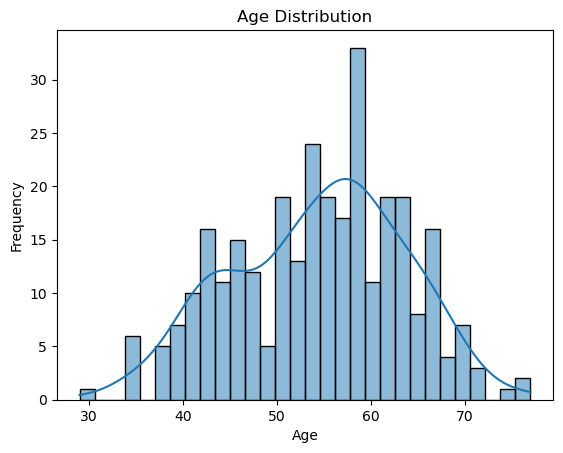

In [99]:
# 1. Distribution of age
sns.histplot(df['age'], bins=30, kde=True)
plt.title('Age Distribution')
plt.xlabel('Age')
plt.ylabel('Frequency')
plt.show()

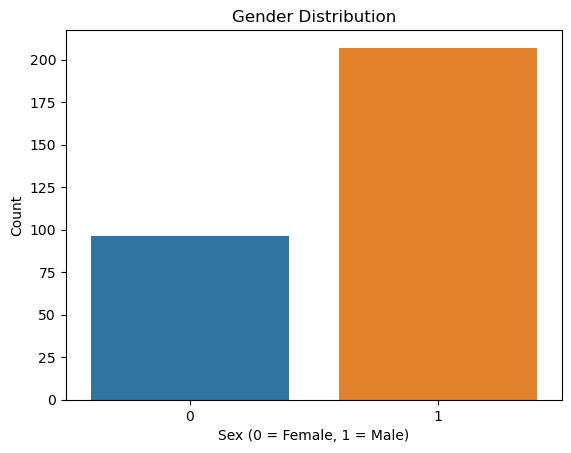

In [109]:
# 2. Distribution of sex
sns.countplot(x='sex', data=df)
plt.title('Gender Distribution')
plt.xlabel('Sex (0 = Female, 1 = Male)')
plt.ylabel('Count')
plt.show()

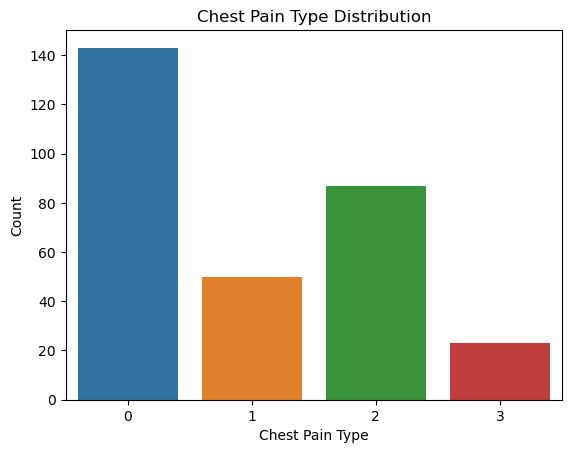

In [95]:
# 3. Chest pain type distribution
sns.countplot(x='cp', data=df)
plt.title('Chest Pain Type Distribution')
plt.xlabel('Chest Pain Type')
plt.ylabel('Count')
plt.show()

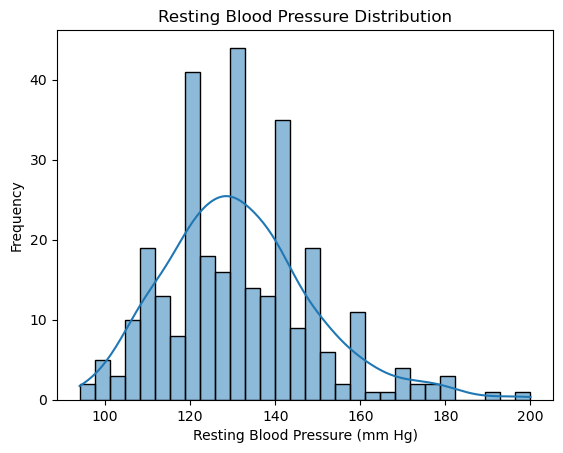

In [93]:

# 4. Distribution of resting blood pressure
sns.histplot(df['trtbps'], bins=30, kde=True)
plt.title('Resting Blood Pressure Distribution')
plt.xlabel('Resting Blood Pressure (mm Hg)')
plt.ylabel('Frequency')
plt.show()

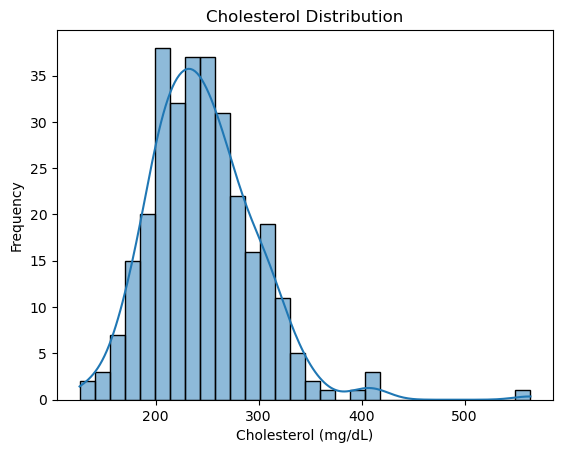

In [91]:
# 5. Distribution of cholesterol
sns.histplot(df['chol'], bins=30, kde=True)
plt.title('Cholesterol Distribution')
plt.xlabel('Cholesterol (mg/dL)')
plt.ylabel('Frequency')
plt.show()


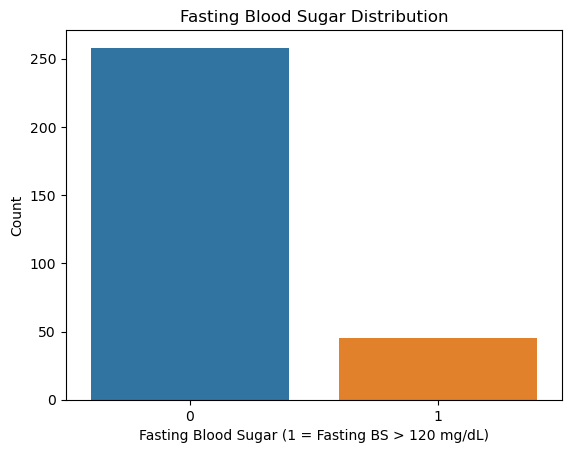

In [87]:
# 6. Fasting blood sugar distribution
sns.countplot(x='fbs', data=df)
plt.title('Fasting Blood Sugar Distribution')
plt.xlabel('Fasting Blood Sugar (1 = Fasting BS > 120 mg/dL)')
plt.ylabel('Count')
plt.show()

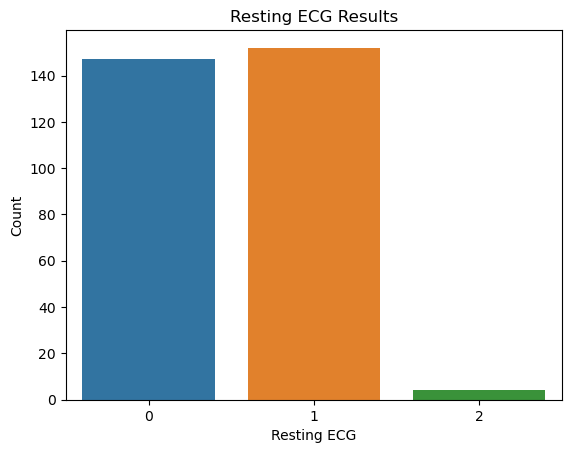

In [89]:
# 7. Resting electrocardiographic results
sns.countplot(x='restecg', data=df)
plt.title('Resting ECG Results')
plt.xlabel('Resting ECG')
plt.ylabel('Count')
plt.show()

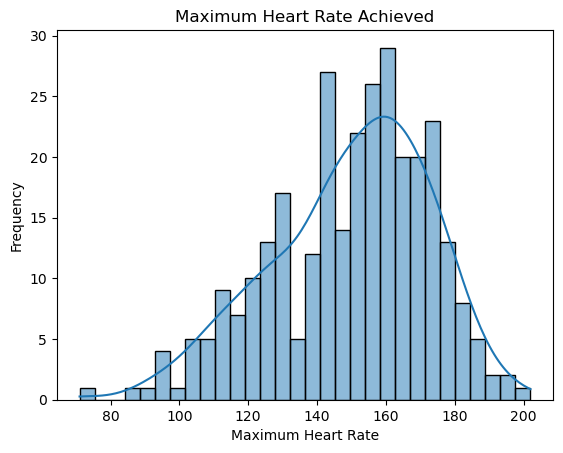

In [83]:
# 8. Maximum heart rate achieved
sns.histplot(df['thalachh'], bins=30, kde=True)
plt.title('Maximum Heart Rate Achieved')
plt.xlabel('Maximum Heart Rate')
plt.ylabel('Frequency')
plt.show()

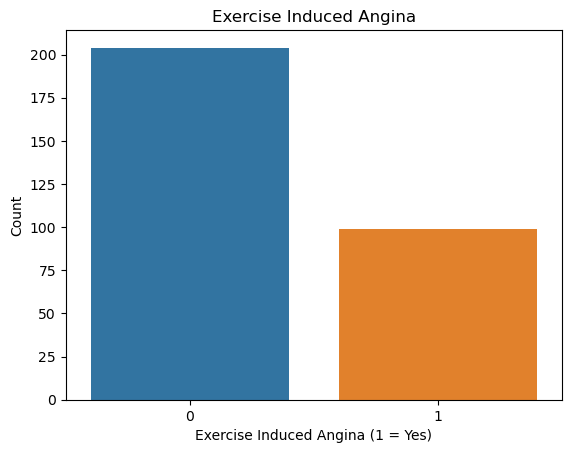

In [81]:
# 9. Exercise induced angina
sns.countplot(x='exng', data=df)
plt.title('Exercise Induced Angina')
plt.xlabel('Exercise Induced Angina (1 = Yes)')
plt.ylabel('Count')
plt.show()

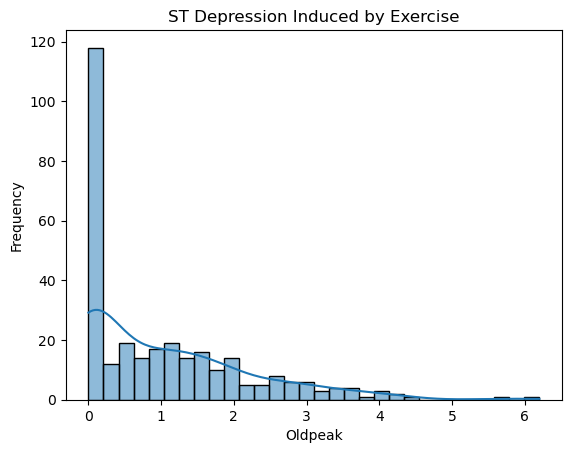

In [79]:
# 10. ST depression induced by exercise relative to rest
sns.histplot(df['oldpeak'], bins=30, kde=True)
plt.title('ST Depression Induced by Exercise')
plt.xlabel('Oldpeak')
plt.ylabel('Frequency')
plt.show()

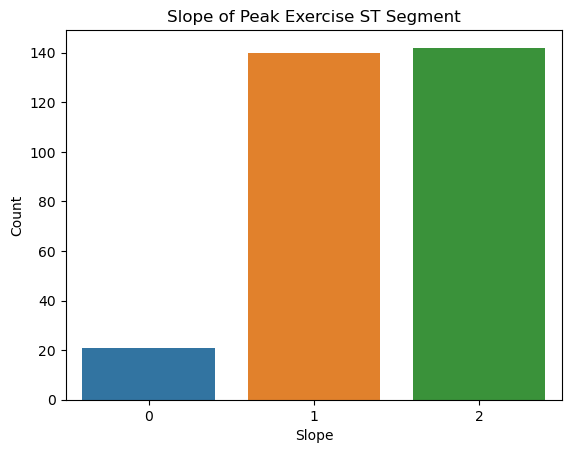

In [77]:
# 11. Slope of the peak exercise ST segment
sns.countplot(x='slp', data=df)
plt.title('Slope of Peak Exercise ST Segment')
plt.xlabel('Slope')
plt.ylabel('Count')
plt.show()

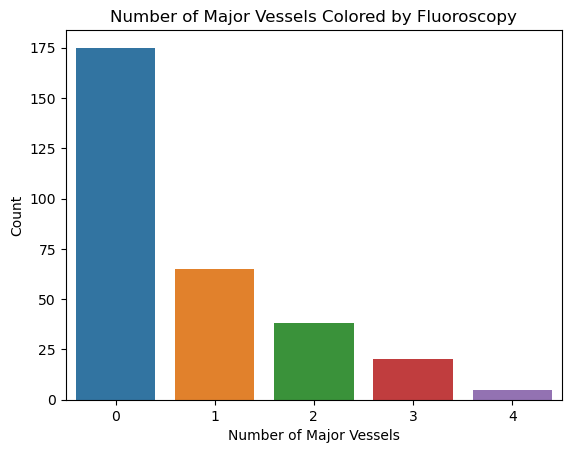

In [75]:
# 12. Number of major vessels colored by fluoroscopy
sns.countplot(x='caa', data=df)
plt.title('Number of Major Vessels Colored by Fluoroscopy')
plt.xlabel('Number of Major Vessels')
plt.ylabel('Count')
plt.show()

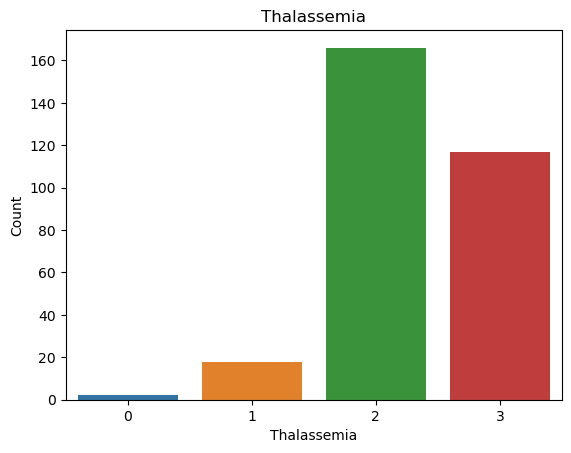

In [73]:
# 13. Thalassemia
sns.countplot(x='thall', data=df)
plt.title('Thalassemia')
plt.xlabel('Thalassemia')
plt.ylabel('Count')
plt.show()

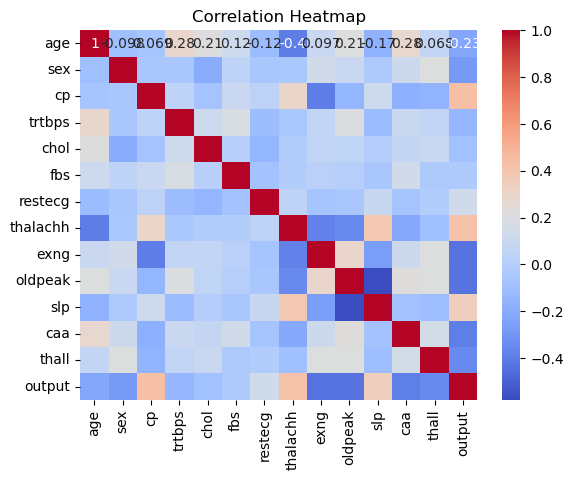

In [71]:
# 15. Correlation heatmap
correlation_matrix = df.corr()
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm')
plt.title('Correlation Heatmap')
plt.show()

In [117]:
bernoulli_model.predict([[20,1,3,130,263,0,1,155,0,2.2,2,0,1]])

array([1], dtype=int64)

In [111]:
df

,age,sex,cp,trtbps,chol,fbs,restecg,thalachh,exng,oldpeak,slp,caa,thall,output
0,63,1,3,145,233,1,0,150,0,2.30,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.50,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.40,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.80,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.60,2,0,2,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
298,57,0,0,140,241,0,1,123,1,0.20,1,0,3,0
299,45,1,3,110,264,0,1,132,0,1.20,1,0,3,0
300,68,1,0,144,193,1,1,141,0,3.40,1,2,3,0
301,57,1,0,130,131,0,1,115,1,1.20,1,1,3,0
